In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data 
df = pd.read_csv(r"C:\Users\BAPS\Downloads\churn_data.csv")

In [3]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Checking shape of data
df.shape

(7043, 9)

In [5]:
# Checking data types
df.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# As TotalCharges should not be Object data type. So will convert it to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
# Checking data type again
df.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
# Checking null values count and percentage
a = pd.DataFrame({'Null Values': df.isnull().sum().values ,'Percent Null Values': (df.isnull().sum()/df.shape[0])*100})
print(a)

                  Null Values  Percent Null Values
customerID                  0             0.000000
tenure                      0             0.000000
PhoneService                0             0.000000
Contract                    0             0.000000
PaperlessBilling            0             0.000000
PaymentMethod               0             0.000000
MonthlyCharges              0             0.000000
TotalCharges               11             0.156183
Churn                       0             0.000000


In [9]:
# Dropping the null values as they are less than 1%
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
# Checking unique value counts for every columns

for i in df.columns:
    print(f'Unique Values in {i}\n{df[i].nunique()}')

Unique Values in customerID
7032
Unique Values in tenure
72
Unique Values in PhoneService
2
Unique Values in Contract
3
Unique Values in PaperlessBilling
2
Unique Values in PaymentMethod
4
Unique Values in MonthlyCharges
1584
Unique Values in TotalCharges
6530
Unique Values in Churn
2


#### From above we can see that PhoneService, Contract, PaperlessBilling, PaymentMethod and Churn are categorical columns

In [13]:
# Checking data type of categorical columns
df.dtypes[df.dtypes=='object']

customerID          object
PhoneService        object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
dtype: object

In [14]:
# customerID column don't have any significant value so will drop this column
df.drop('customerID',axis=1, inplace=True)

In [15]:
# Filtering categorical columns
cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)

Index(['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')


In [16]:
# Let's check unique values in those columns
for i in cat_cols:
    print(df[i].value_counts(),'\n')

Yes    6352
No      680
Name: PhoneService, dtype: int64 

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64 

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64 

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64 

No     5163
Yes    1869
Name: Churn, dtype: int64 



### EDA

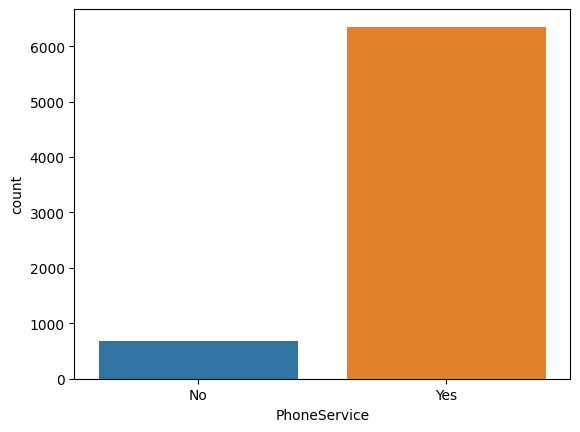

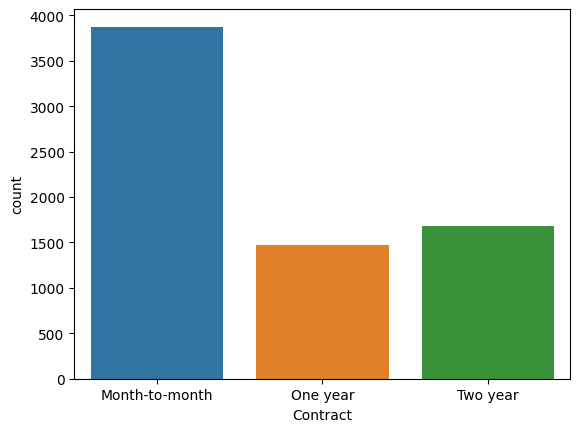

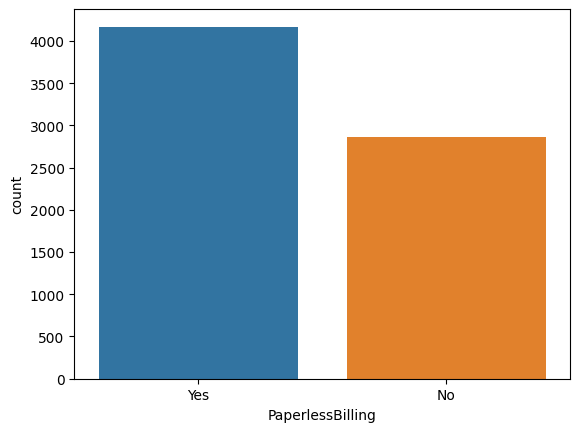

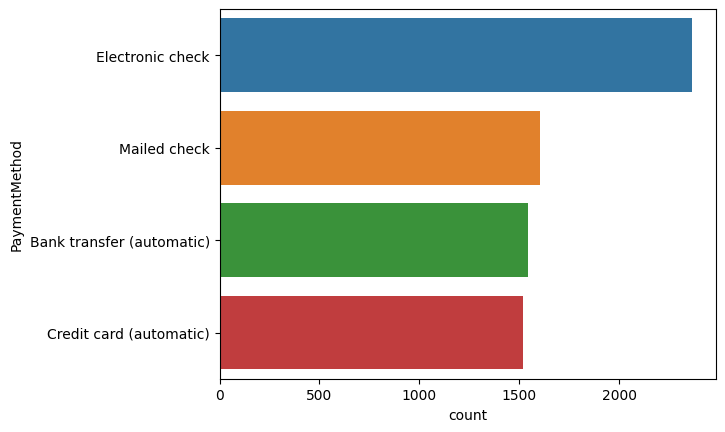

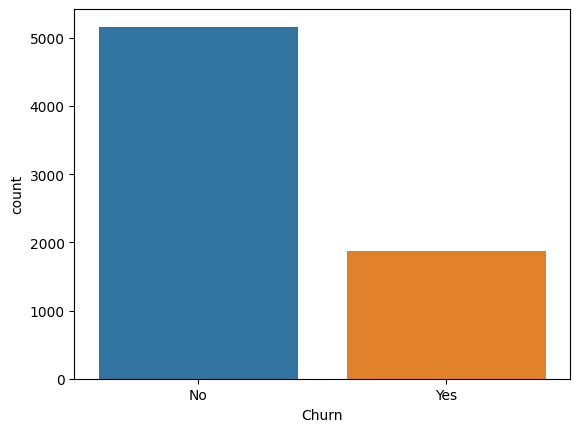

In [17]:
# Checking distribution of data for each categorical column

for i in cat_cols:
    if i == 'PaymentMethod':
        sns.countplot(y=df[i])
        plt.show()
    else:
        sns.countplot(x=df[i])
        plt.show()    

### Inferences
1. More number of customers have Month-to-month contract, followed by Two year and then one year<br>
2. Maximum customers prefer paper less billing<br>
3. More number of customers pay their bills using Electronic check, followed by mailed check, bank transfer and Credit card<br>

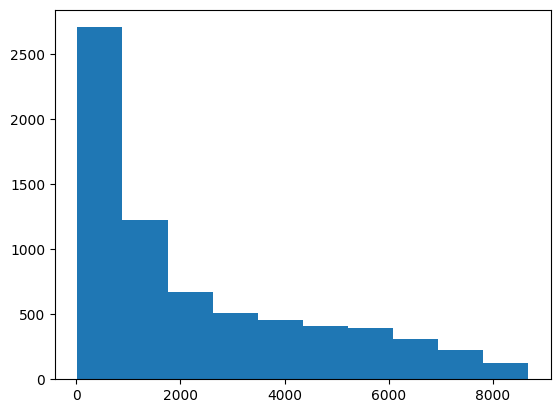

In [18]:
# Checking distribution of total charges
plt.hist(df['TotalCharges'])
plt.show()

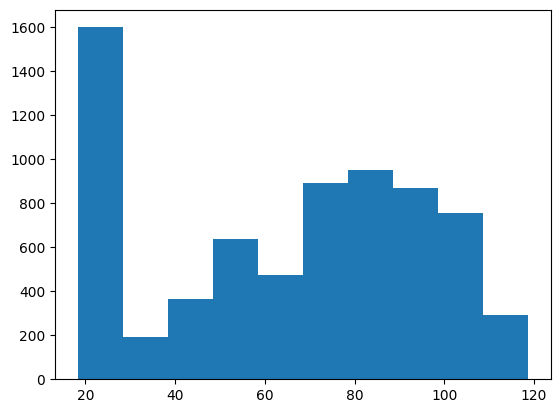

In [19]:
# Checking distribution of MonthlyCharges
plt.hist(df['MonthlyCharges'])
plt.show()

### Label Encoding

In [20]:
# Will use Label Encoding to encode the categorical columns
from sklearn.preprocessing import LabelEncoder   # importing from library

# creating model of label encoder
le = LabelEncoder()

In [21]:
for i in cat_cols:
    df[i] = le.fit_transform(df[i])  #1st it will fit the lables as per cat. then transform them to labels

In [22]:
# Let's check unique values in those columns after label encoding 
for i in cat_cols:
    print(df[i].value_counts(),'\n')

1    6352
0     680
Name: PhoneService, dtype: int64 

0    3875
2    1685
1    1472
Name: Contract, dtype: int64 

1    4168
0    2864
Name: PaperlessBilling, dtype: int64 

2    2365
3    1604
0    1542
1    1521
Name: PaymentMethod, dtype: int64 

0    5163
1    1869
Name: Churn, dtype: int64 



In [23]:
# Checking data type
df.dtypes

tenure                int64
PhoneService          int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

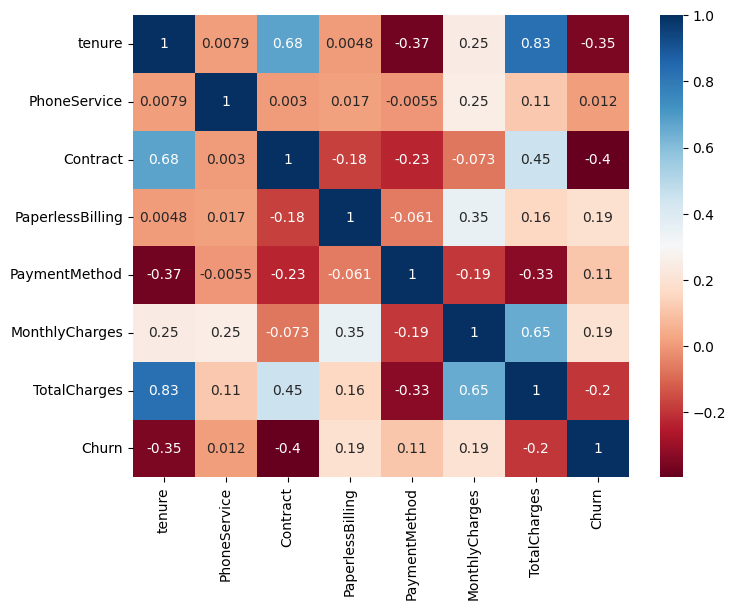

In [24]:
# Checking the correlation 
corr = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.show()

#### From above we can see that non of the dependent features are highly correlated 

### Checking Outliers using box plot

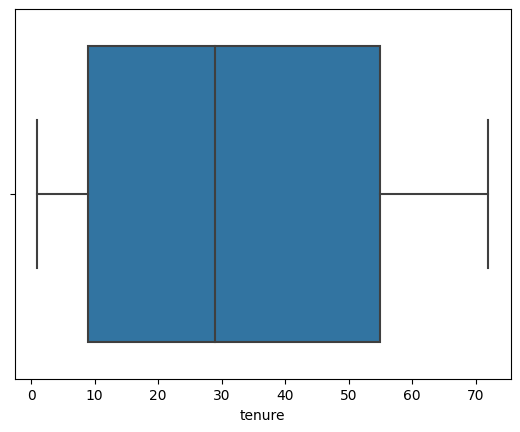

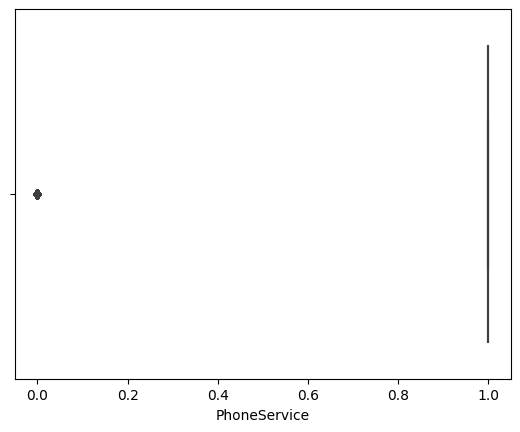

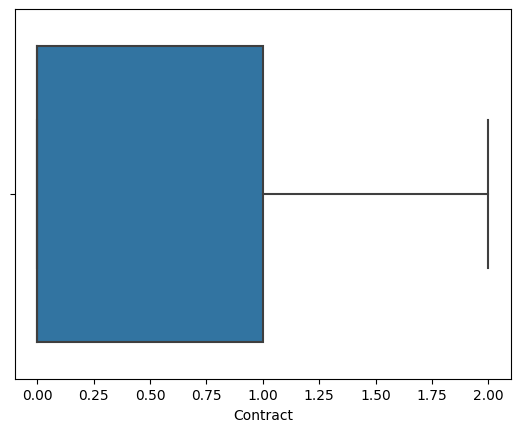

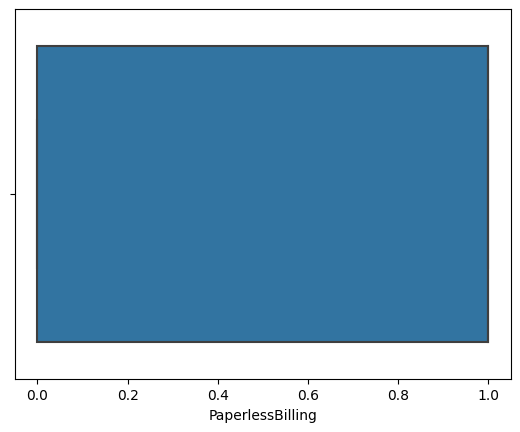

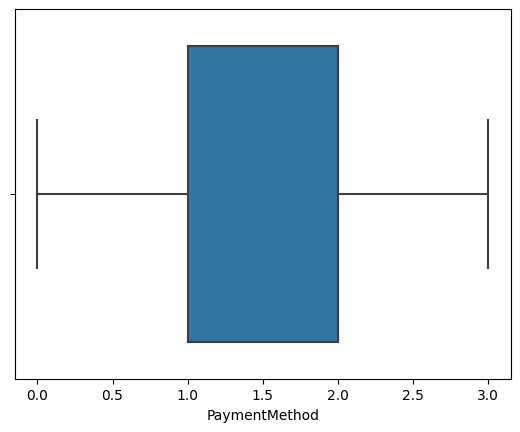

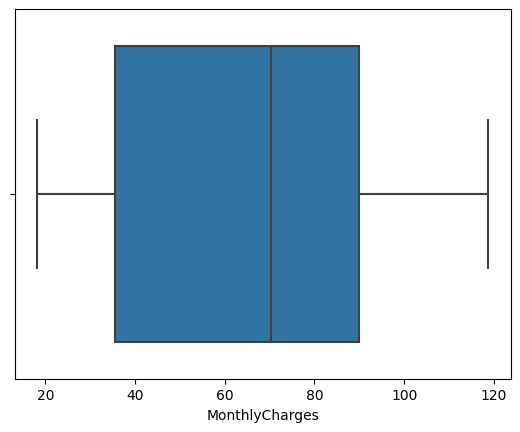

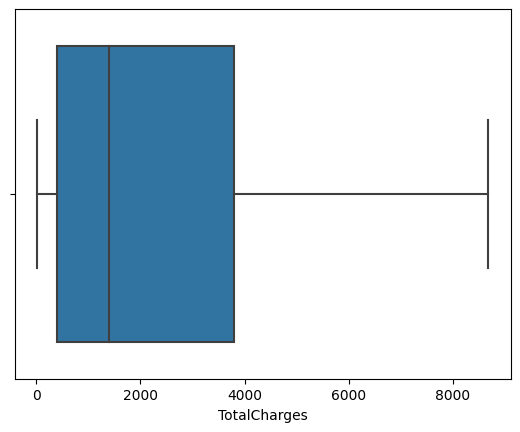

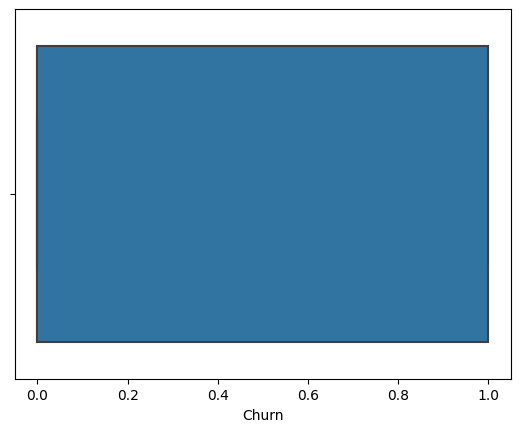

In [25]:
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.show()

##### From above we can see that there are no outliers in our data 

## Building the Logistic Regression Model 

#### Splitting data into x and y

In [26]:
x = df.drop('Churn', axis=1)
y = df['Churn']    

#### Splitting data into train and test 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5625, 7)
(5625,)
(1407, 7)
(1407,)


In [29]:
# Importing library
from sklearn.linear_model import LogisticRegression

# Building the model
lr = LogisticRegression()

# Fitting the model on training data
lr.fit(x_train, y_train)

LogisticRegression()

In [30]:
# Creating function for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print('Accuracy Score', accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred))

In [31]:
# generating predections 
ypred = lr.predict(x_test)

In [32]:
# Checking the train and test score
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.7978666666666666
0.7874911158493249


In [33]:
eval_model(y_test,ypred)

[[918 115]
 [184 190]]
Accuracy Score 0.7874911158493249
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



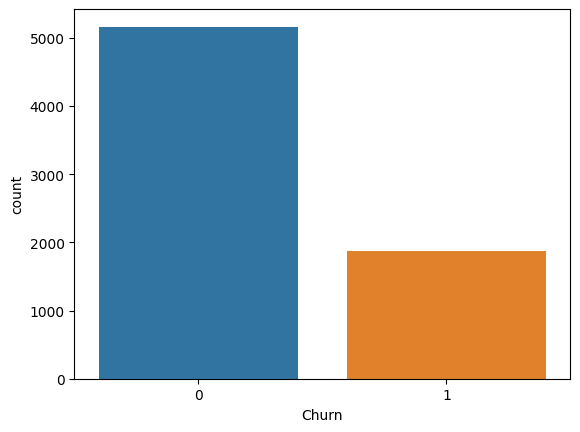

In [34]:
sns.countplot(x='Churn', data=df)
plt.show()

From above we can see that data is imbalanced. 0 has more counts so model is generating good predections for 0

### ROC_AUC Curve

In [35]:
# computing probability for y pred
ypred_lr_proba = lr.predict_proba(x_test)
print(len(ypred_lr_proba))
print(ypred_lr_proba[:10])

1407
[[0.99877505 0.00122495]
 [0.89986251 0.10013749]
 [0.28788914 0.71211086]
 [0.83711641 0.16288359]
 [0.56789509 0.43210491]
 [0.51552089 0.48447911]
 [0.91164402 0.08835598]
 [0.37025386 0.62974614]
 [0.66721283 0.33278717]
 [0.98243359 0.01756641]]


In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
# roc_auc_score returns AUC

In [37]:
# Creating udf for ROC AUC Curve 
def plot_roc_auc(model,ytest,ypred_proba):
    fpr,tpr,thresh = roc_curve(ytest,ypred_proba[:,1])    # False positive rate, true positive rate and threshold
    auc = roc_auc_score(ytest,ypred_proba[:,1])
    print('Area Under Curve is',auc*100, '%')
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],label='TPR=FPR',color='red')
    plt.xlabel('FPR',fontsize=15)
    plt.ylabel('TPR',fontsize=15)
    plt.title('ROC Curve',fontsize=16)
    plt.legend()
    plt.show()
    return fpr,tpr,thresh

Area Under Curve is 82.57813025764737 %


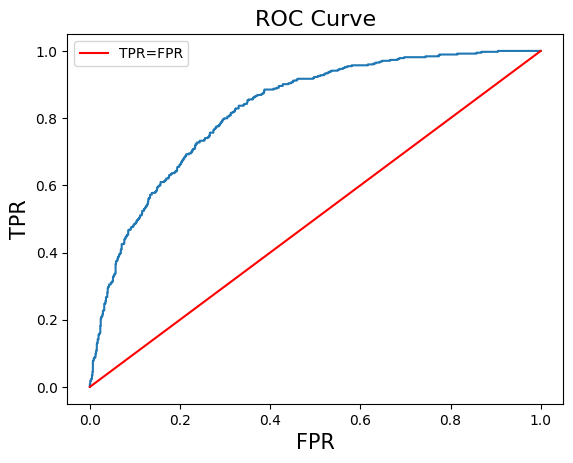

In [38]:
# Plotting the curve
fpr_lr1,tpr_lr1,thresh_lr1 = plot_roc_auc(lr,y_test,ypred_lr_proba)

In [39]:
# Best threshold
best_thresh_idx = np.argmax(tpr_lr1*(1-fpr_lr1))
print(best_thresh_idx)
print(thresh_lr1[best_thresh_idx])

299
0.2909705363221675
